/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


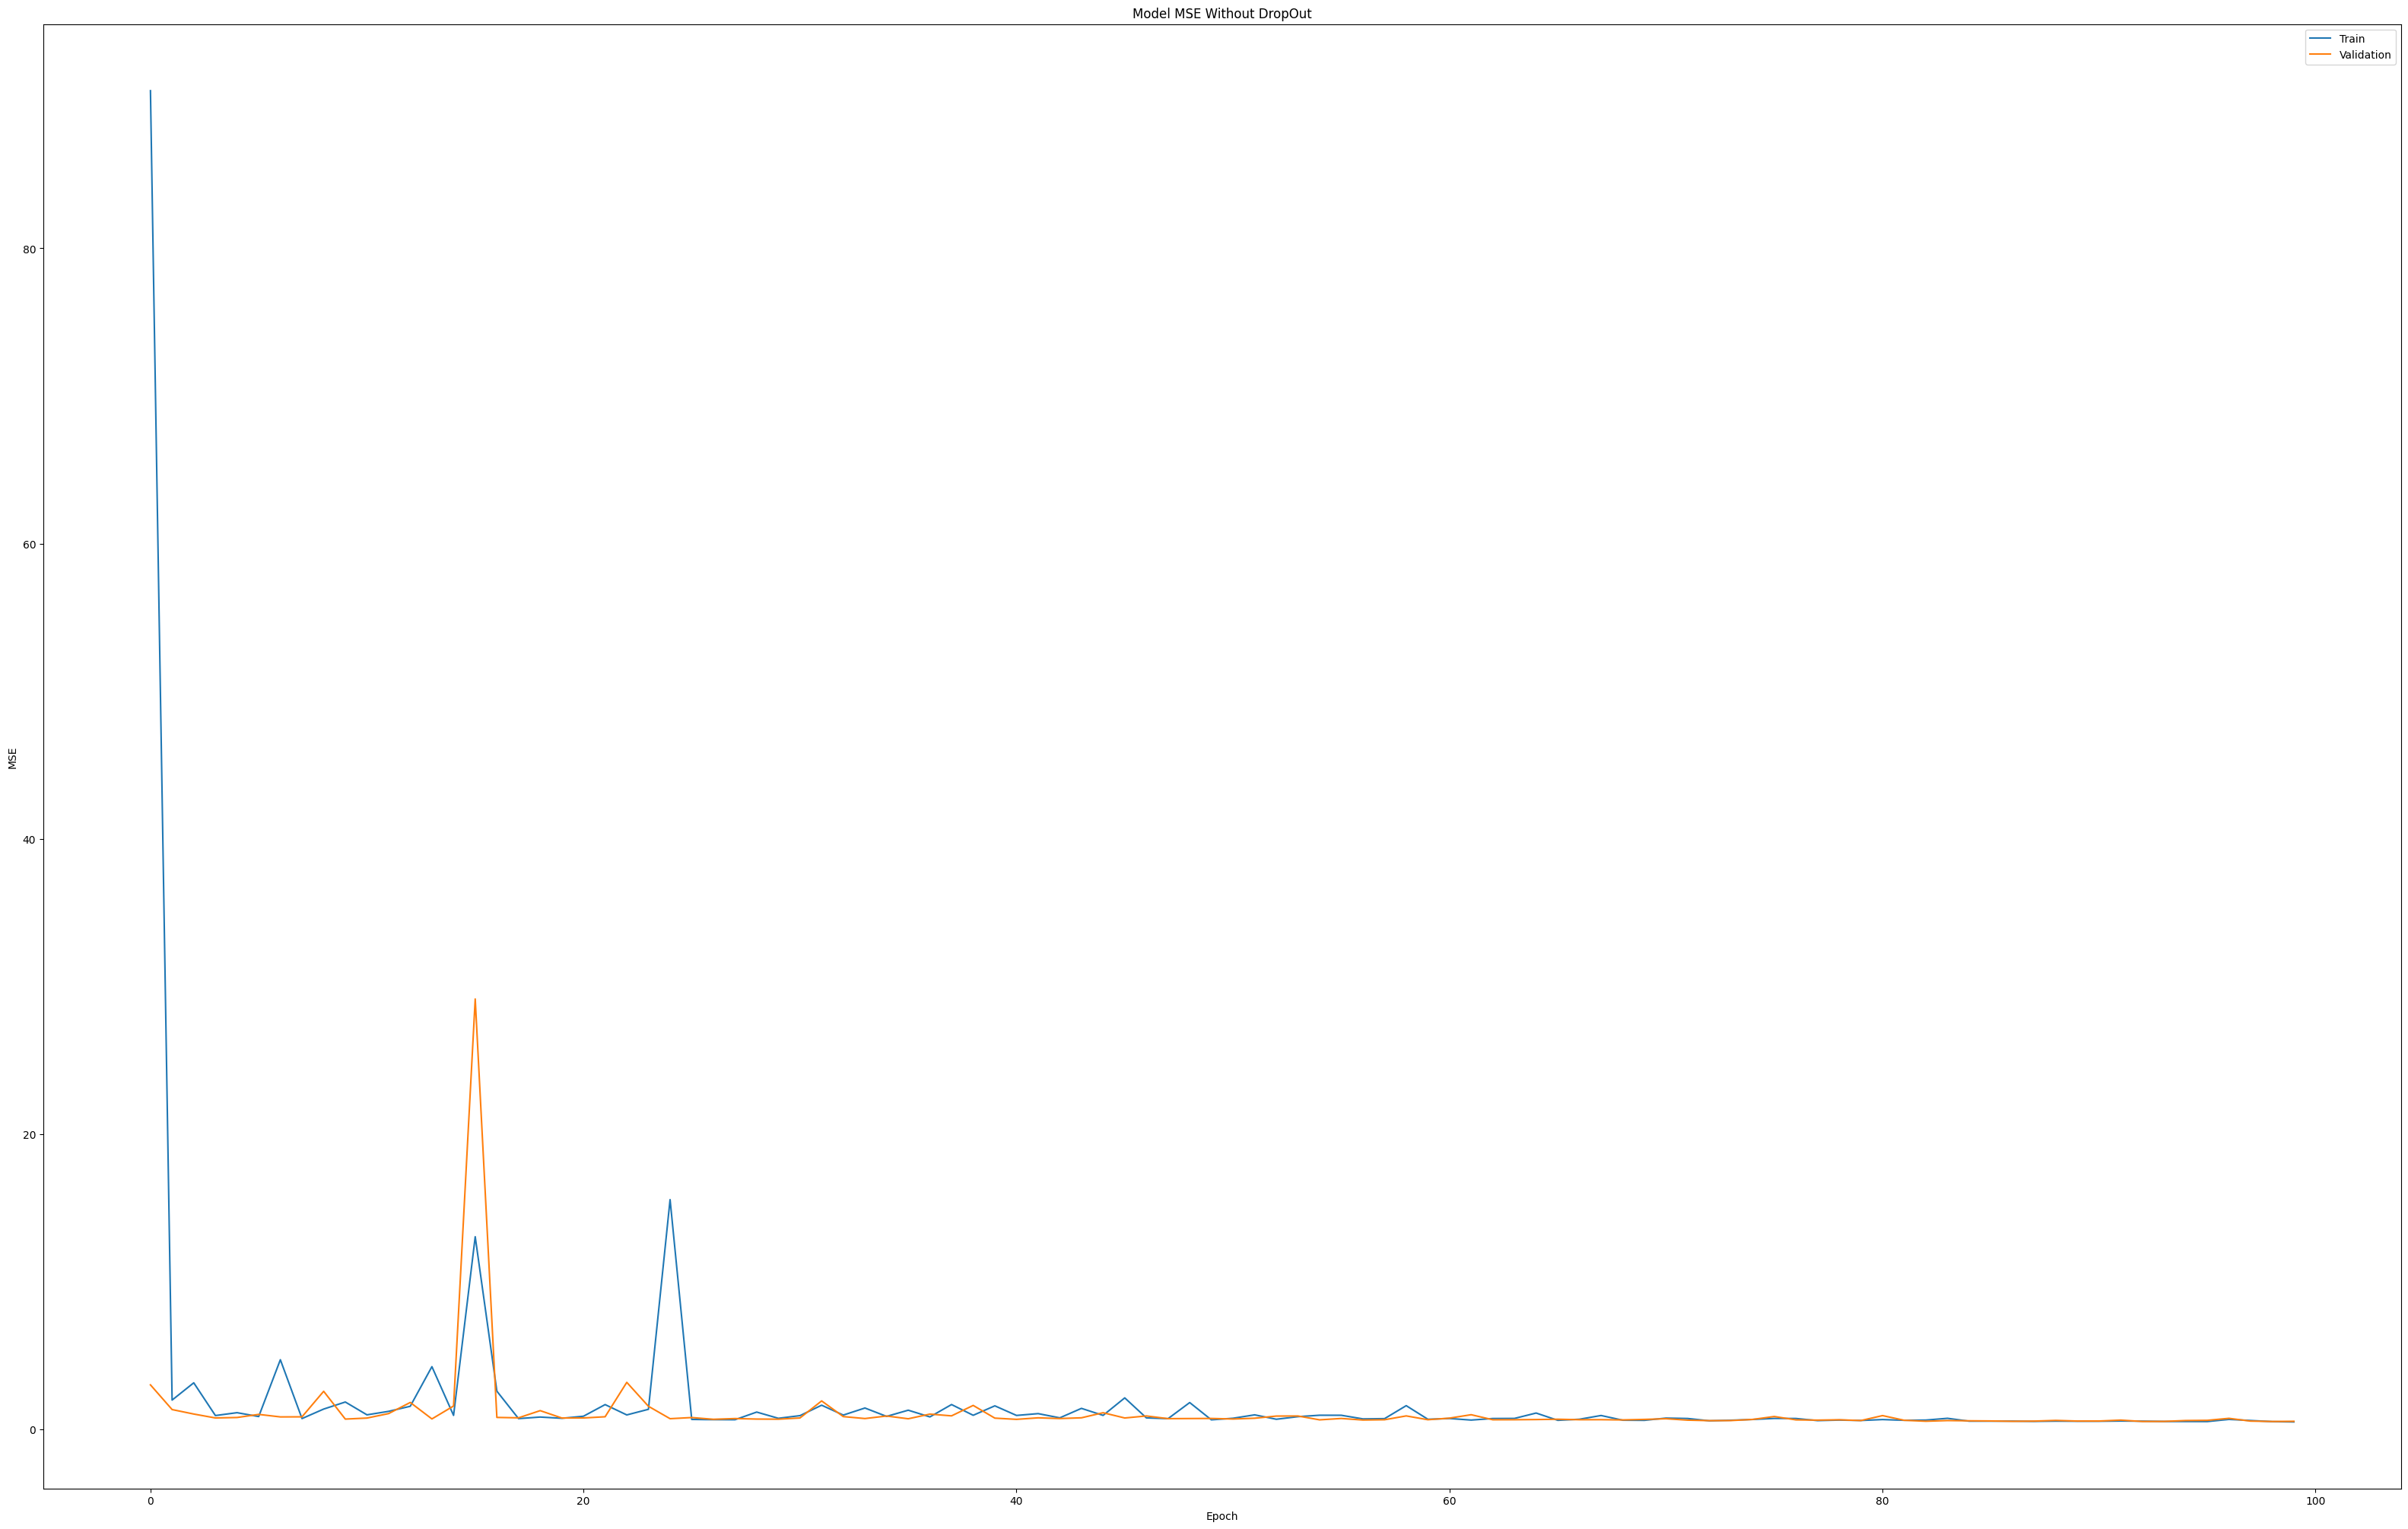

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


veri=fetch_california_housing()

x=veri.data
y=veri.target.reshape(-1,1)

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=0.1, random_state=0)

model=Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=["mse"])
m1=model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, verbose=0)

plt.figure(figsize=(40,25))
plt.plot(m1.history["mse"])
plt.plot(m1.history["val_mse"])
plt.title("Model MSE Without DropOut")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

Epoch 20: early stopping


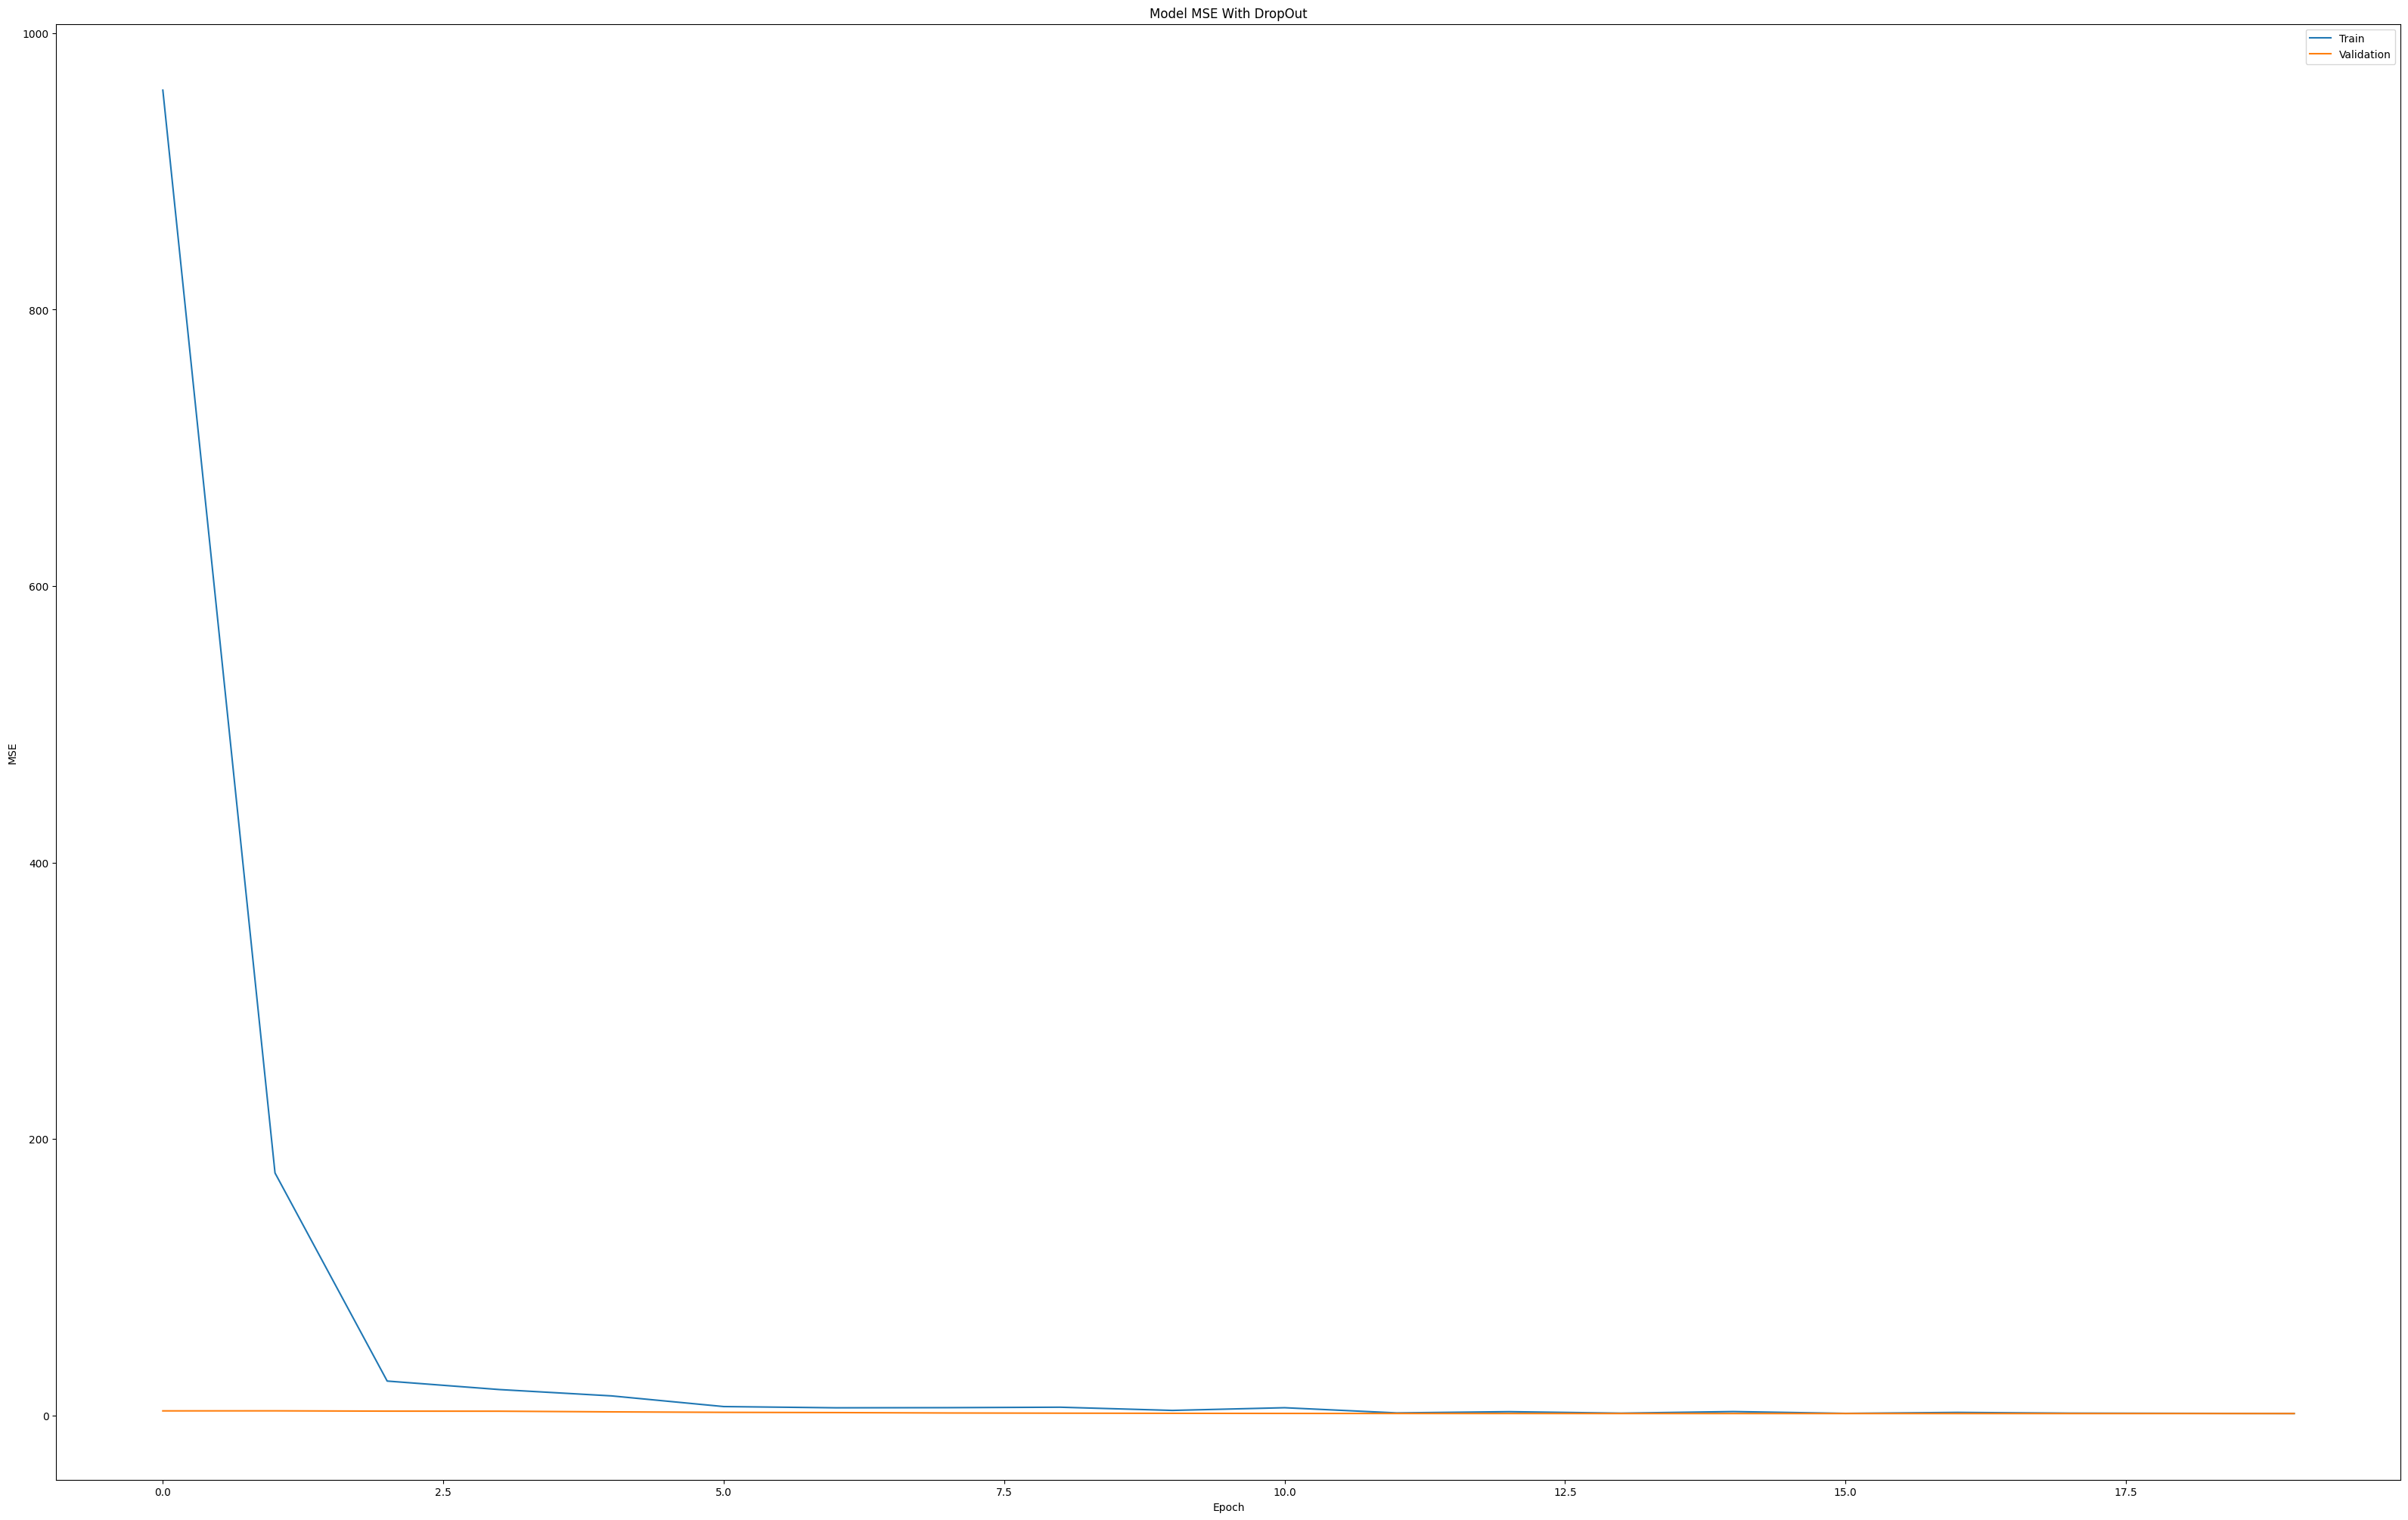

In [4]:
model=Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=["mse"])
es=EarlyStopping(monitor="val_loss", patience=2, mode="min", verbose=1)
m1=model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, verbose=0, callbacks=[es])

plt.figure(figsize=(40,25))
plt.plot(m1.history["mse"])
plt.plot(m1.history["val_mse"])
plt.title("Model MSE With DropOut")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()